In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
output_type = "png" # or "pdf"
timevis = "noB_tnn"
dvi = "parametricUmap_step2_A"

In [3]:
DATASET = "mnist"
CONTENT_PATH = "/home/xianglin/projects/DVI_data/resnet18_{}".format(DATASET)
content_path = CONTENT_PATH

In [4]:
train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_corrs.npy".format(timevis)))
train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_ps.npy".format(timevis)))
train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_5_tnn.npy".format(timevis)))
test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_corrs.npy".format(timevis)))
test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_ps.npy".format(timevis)))
test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_5_tnn.npy".format(timevis)))


dvi_train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_corrs.npy".format(dvi)))
dvi_train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_ps.npy".format(dvi)))
dvi_train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_5_tnn.npy".format(dvi)))
dvi_test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_corrs.npy".format(dvi)))
dvi_test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_ps.npy".format(dvi)))
dvi_test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_5_tnn.npy".format(dvi)))


In [5]:
selected_idxs = np.argsort(train_corrs[19])[-100:]

(<seaborn.axisgrid.FacetGrid at 0x7fb4dc4bfa50>,
 <seaborn.axisgrid.FacetGrid at 0x7fb4dc6110d0>)

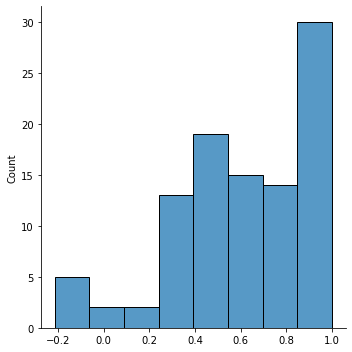

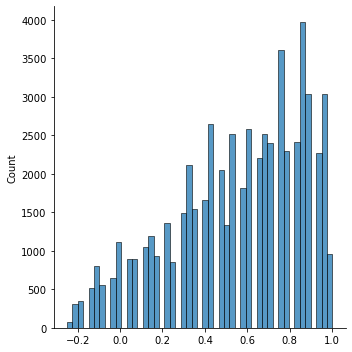

In [6]:
sns.displot(train_corrs[0][selected_idxs]),sns.displot(train_corrs[0])

In [6]:
epoch_num = train_corrs.shape[0]
train_num = train_corrs.shape[1]
test_num = test_corrs.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_corrs)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_corrs[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_corrs)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_corrs[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_corrs)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_corrs[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_corrs)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_corrs[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["corr", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)


In [7]:
plt.rcParams['figure.dpi'] = 100  # 图形分辨率
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
plt.title("MNIST")
fg = sns.lineplot(x="epoch", y="corr", hue="method", style="type", markers=False, ci=95, data=df3)
plt.savefig(
    "./plot_results/corr_3_{}.{}".format("mnist", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [7]:
epoch_num = train_tnn.shape[0]
train_num = train_tnn.shape[1]
test_num = test_tnn.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_tnn)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_tnn[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_tnn)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_tnn[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_tnn)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_tnn[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_tnn)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_tnn[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["tnn", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)
plt.rcParams['figure.dpi'] = 100  # 图形分辨率
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
plt.title("MNIST")
fg = sns.lineplot(x="epoch", y="tnn", hue="method", style="type", markers=False, ci=95, data=df3)
plt.savefig(
    "./plot_results/tnn_{}.{}".format("mnist", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [3]:
DATASET = "fmnist"
CONTENT_PATH = "/home/xianglin/projects/DVI_data/resnet18_{}".format(DATASET)
content_path = CONTENT_PATH

In [4]:
train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_corrs.npy".format(timevis)))
train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_ps.npy".format(timevis)))
train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_5_tnn.npy".format(timevis)))
test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_corrs.npy".format(timevis)))
test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_ps.npy".format(timevis)))
test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_5_tnn.npy".format(timevis)))


dvi_train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_corrs.npy".format(dvi)))
dvi_train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_ps.npy".format(dvi)))
dvi_train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_5_tnn.npy".format(dvi)))
dvi_test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_corrs.npy".format(dvi)))
dvi_test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_ps.npy".format(dvi)))
dvi_test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_5_tnn.npy".format(dvi)))

In [5]:
epoch_num = train_corrs.shape[0]
train_num = train_corrs.shape[1]
test_num = test_corrs.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_corrs)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_corrs[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_corrs)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_corrs[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_corrs)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_corrs[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_corrs)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_corrs[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["corr", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)

In [6]:
plt.rcParams['figure.dpi'] = 100  # 图形分辨率
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
plt.title("FMNIST")
sns.lineplot(x="epoch", y="corr", hue="method", style="type", markers=False, ci=95, data=df3)

plt.savefig(
    "./plot_results/corr_3_{}.{}".format("fmnist", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [7]:
epoch_num = train_tnn.shape[0]
train_num = train_tnn.shape[1]
test_num = test_tnn.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_tnn)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_tnn[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_tnn)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_tnn[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_tnn)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_tnn[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_tnn)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_tnn[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["tnn", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)
plt.rcParams['figure.dpi'] = 100  # 图形分辨率
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
plt.title("FMNIST")
sns.lineplot(x="epoch", y="tnn", hue="method", style="type", markers=False, ci=95, data=df3)

plt.savefig(
    "./plot_results/tnn_{}.{}".format("fmnist", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [8]:
DATASET = "cifar10"
CONTENT_PATH = "/home/xianglin/projects/DVI_data/resnet18_{}".format(DATASET)
content_path = CONTENT_PATH

In [9]:
train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_corrs.npy".format(timevis)))
train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_ps.npy".format(timevis)))
train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_3_5_tnn.npy".format(timevis)))
test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_corrs.npy".format(timevis)))
test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_ps.npy".format(timevis)))
test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "{}_test_3_5_tnn.npy".format(timevis)))


dvi_train_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_corrs.npy".format(dvi)))
dvi_train_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_ps.npy".format(dvi)))
dvi_train_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_train_{}_3_5_tnn.npy".format(dvi)))
dvi_test_corrs = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_corrs.npy".format(dvi)))
dvi_test_ps = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_ps.npy".format(dvi)))
dvi_test_tnn = np.load(os.path.join(CONTENT_PATH, "Model", "DVI_test_{}_3_5_tnn.npy".format(dvi)))

In [10]:
epoch_num = train_corrs.shape[0]
train_num = train_corrs.shape[1]
test_num = test_corrs.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_corrs)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_corrs[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_corrs)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_corrs[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_corrs)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_corrs[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_corrs)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_corrs[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["corr", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)

In [11]:
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')
plt.title("CIFAR10")
sns.lineplot(x="epoch", y="corr", hue="method", style="type", markers=False, ci=95, data=df3)
plt.savefig(
    "./plot_results/corr_3_{}.{}".format("cifar10", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [12]:
epoch_num = train_tnn.shape[0]
train_num = train_tnn.shape[1]
test_num = test_tnn.shape[1]

train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(train_tnn)):
    train_data[i*train_num:(i+1)*train_num][:,0] = train_tnn[i]
    train_data[i*train_num:(i+1)*train_num][:,1] = i+1
test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(test_tnn)):
    test_data[i*test_num:(i+1)*test_num][:,0] = test_tnn[i]
    test_data[i*test_num:(i+1)*test_num][:,1] = i+1
data = np.concatenate((train_data, test_data), axis=0)
type = ["Train" for _ in range(len(train_data))] + ["Test" for _ in range(len(test_data))]
method = ["TimeVis" for _ in range(len(data))]

dvi_train_data = np.zeros((epoch_num*train_num, 2))
for i in range(len(dvi_train_tnn)):
    dvi_train_data[i*train_num:(i+1)*train_num][:,0] = dvi_train_tnn[i]
    dvi_train_data[i*train_num:(i+1)*train_num][:,1] = i+1
dvi_test_data = np.zeros((epoch_num*test_num, 2))
for i in range(len(dvi_test_tnn)):
    dvi_test_data[i*test_num:(i+1)*test_num][:,0] = dvi_test_tnn[i]
    dvi_test_data[i*test_num:(i+1)*test_num][:,1] = i+1
dvi_data = np.concatenate((dvi_train_data, dvi_test_data), axis=0)
dvi_type = ["Train" for _ in range(len(dvi_train_data))]+["Test" for _ in range(len(dvi_test_data))]
dvi_method = ["DVI" for _ in range(len(dvi_data))]

data = np.concatenate((data, dvi_data), axis=0)
type = type + dvi_type
method = method + dvi_method

df = pd.DataFrame(data,columns=["tnn", "epoch"])
df2 = df.assign(type = type)
df3 = df2.assign(method = method)
df3[["epoch"]] = df[["epoch"]].astype(int)
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')
plt.title("CIFAR10")
sns.lineplot(x="epoch", y="tnn", hue="method", style="type", markers=False, ci=95, data=df3)
plt.savefig(
    "./plot_results/tnn_{}.{}".format("cifar10", output_type),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)
plt.clf()

<Figure size 600x400 with 0 Axes>

In [15]:
# simple
def draw(corrs, ps, corrs2, ps2, title):
    fig, axs = plt.subplots(2)
    fig.suptitle(title)

    epochs = [i for i in range(1, len(corrs)+1, 1)]
    mean_corr1 = np.mean(corrs, axis=1)
    var_corr1 = np.std(corrs, axis=1)
    mean_p1 = np.mean(ps, axis=1)
    var_p1 = np.std(ps, axis=1)

    mean_corr2 = np.mean(corrs2, axis=1)
    var_corr2 = np.std(corrs2, axis=1)
    mean_p2 = np.mean(ps2, axis=1)
    var_p2 = np.std(ps2, axis=1)

    a11 = axs[0].plot(epochs, mean_corr1, "b.-", epochs, mean_p1, "r+-")
    a12 = axs[0].fill_between(epochs, mean_corr1-var_corr1, mean_corr1+var_corr1)
    a13 = axs[0].fill_between(epochs, mean_p1-var_p1, mean_p1+var_p1)

    a21 = axs[1].plot(epochs, mean_corr2, "b.-", epochs, mean_p2, "r+-")
    a22 = axs[1].fill_between(epochs, mean_corr2-var_corr2, mean_corr2+var_corr2)
    a23 = axs[1].fill_between(epochs, mean_p2-var_p2, mean_p2+var_p2)


    plt.show()
    plt.clf()